In [ ]:
#Change input shape

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(224, 224,1)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_132 (Conv2D)          (None, 224, 224, 32)      320       
_________________________________________________________________
conv2d_133 (Conv2D)          (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_135 (Conv2D)          (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 56, 56, 128)     

In [ ]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
checkpoint_path = "drive/MyDrive/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [ ]:
history = model.fit(x_train,y_train,epochs = 100 , validation_data = (x_val, y_val), callbacks=[cp_callback])

Epoch 1/100
273/273 [==============================] - 20s 68ms/step - loss: 232.9931 - accuracy: 0.5856 - val_loss: 105.9960 - val_accuracy: 0.6737

Epoch 00001: saving model to drive/MyDrive/cp.ckpt
Epoch 2/100
273/273 [==============================] - 17s 63ms/step - loss: 82.9901 - accuracy: 0.7008 - val_loss: 66.4388 - val_accuracy: 0.7429

Epoch 00002: saving model to drive/MyDrive/cp.ckpt
Epoch 3/100
273/273 [==============================] - 17s 63ms/step - loss: 51.1744 - accuracy: 0.7720 - val_loss: 54.1692 - val_accuracy: 0.7568

Epoch 00003: saving model to drive/MyDrive/cp.ckpt
Epoch 4/100
273/273 [==============================] - 17s 63ms/step - loss: 39.4196 - accuracy: 0.8011 - val_loss: 43.4603 - val_accuracy: 0.7863

Epoch 00004: saving model to drive/MyDrive/cp.ckpt
Epoch 5/100
273/273 [==============================] - 17s 63ms/step - loss: 31.5057 - accuracy: 0.8261 - val_loss: 46.8951 - val_accuracy: 0.7953

Epoch 00005: saving model to drive/MyDrive/cp.ckpt
Epo

In [ ]:
model.save('drive/MyDrive/resizedmodel')

INFO:tensorflow:Assets written to: drive/MyDrive/resizedmodel/assets


INFO:tensorflow:Assets written to: drive/MyDrive/resizedmodel/assets


Loss analysis

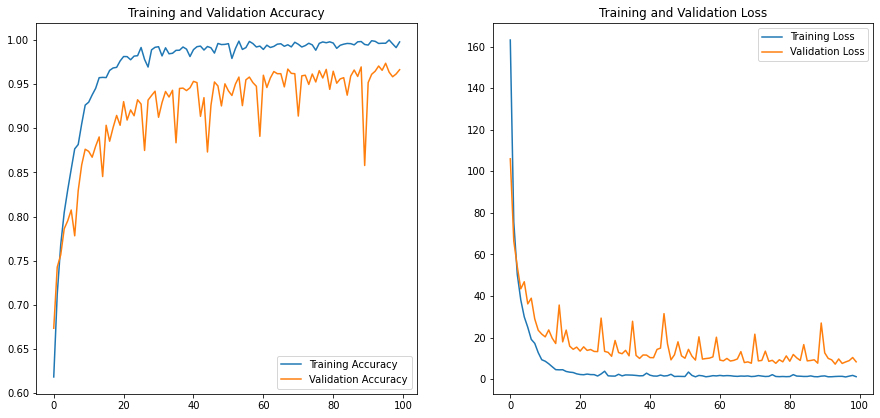

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_test, predictions,target_names = ['NORMAL','COVID']))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

      NORMAL       0.98      0.94      0.96      1122
       COVID       0.96      0.99      0.98      1776

    accuracy                           0.97      2898
   macro avg       0.97      0.96      0.97      2898
weighted avg       0.97      0.97      0.97      2898

